## Splitting dataset on train and test parts

In [1]:
import numpy as np
print('Numpy version:', np.__version__)

import pandas as pd
print('Pandas version:', pd.__version__)

import matplotlib as mpl
print('Matplotlib version:', mpl.__version__)
import matplotlib.pyplot as plt

import seaborn as sns
print('Seaborn version:', sns.__version__)

from pandas_profiling import ProfileReport

import scipy
print('Scipy version:', scipy.__version__)

import statsmodels.api as sm
print('Statsmodels version:', sm.__version__)

import phik
from phik.report import plot_correlation_matrix

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.impute import SimpleImputer, KNNImputer

Numpy version: 1.23.5
Pandas version: 1.5.2
Matplotlib version: 3.6.2
Seaborn version: 0.12.1
Scipy version: 1.9.3
Statsmodels version: 0.13.5


In [2]:
df = pd.read_csv('datasets/bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

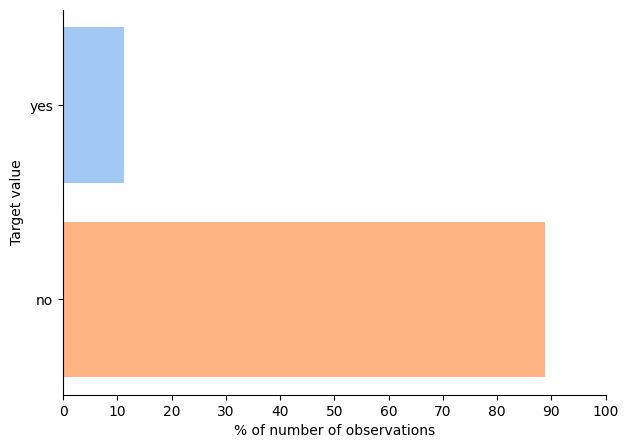

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.barh(y=df['y'].value_counts(normalize=True).index, width=df['y'].value_counts(normalize=True).values, color=[sns.color_palette('pastel')[1], sns.color_palette('pastel')[0]])
ax.set_ylabel('Target value')
ax.set_xlabel('% of number of observations')
ax.set_xticks(np.arange(0.0, 1.1, 0.1))
ax.set_xticklabels([int(x*100) for x in np.arange(00.0, 1.1, 0.1)])
ax.spines['right'].set_visible(False);
ax.spines['top'].set_visible(False)

We have highly imbalanced dataset where positive target values are about 11% of total observations number.  
We should use stratified split to get the train and test datasets

In [5]:
df_train, df_test = train_test_split(df, test_size=0.3, stratify=df['y'], random_state=42)
print('Train dataset dimensions:', df_train.shape)
print('Test dataset dimensions:', df_test.shape)

print('Initial dataset target labels ratio: {:.3f}'.format(len(df[df['y']=='yes'])/len(df)))
print('Train set target labels ratio: {:.3f}'.format(len(df_train[df_train['y']=='yes'])/len(df_train)))
print('Test set target labels ratio: {:.3f}'.format(len(df_test[df_test['y']=='yes'])/len(df_test)))

Train dataset dimensions: (28831, 21)
Test dataset dimensions: (12357, 21)
Initial dataset target labels ratio: 0.113
Train set target labels ratio: 0.113
Test set target labels ratio: 0.113


In [6]:
df_train.to_csv('datasets/bank-train.csv', index=False)
df_test.to_csv('datasets/bank-test.csv', index=False)

# EDA

Note: Initial dataset was splitted on train and test sets by using stratified split on target ('y'). EDA is performed **only on training part**

In [7]:
# SETTINGS
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 4)
#pd.set_option('display.float_format',  '{:`}'.format)
sns.set_palette('pastel')

In [8]:
df = df_train.copy()
df.reset_index(drop=True, inplace=True)
df_train = None
df_test = None
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
7309,50,blue-collar,single,basic.4y,no,no,no,telephone,may,thu,152,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
4169,51,services,married,professional.course,unknown,no,no,telephone,may,mon,158,5,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
35810,46,technician,divorced,professional.course,no,yes,no,cellular,may,mon,214,2,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
9668,46,admin.,single,university.degree,no,yes,no,telephone,jun,mon,24,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
34389,25,services,single,high.school,no,no,no,cellular,may,thu,646,5,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28831 entries, 7309 to 10241
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             28831 non-null  int64  
 1   job             28831 non-null  object 
 2   marital         28831 non-null  object 
 3   education       28831 non-null  object 
 4   default         28831 non-null  object 
 5   housing         28831 non-null  object 
 6   loan            28831 non-null  object 
 7   contact         28831 non-null  object 
 8   month           28831 non-null  object 
 9   day_of_week     28831 non-null  object 
 10  duration        28831 non-null  int64  
 11  campaign        28831 non-null  int64  
 12  pdays           28831 non-null  int64  
 13  previous        28831 non-null  int64  
 14  poutcome        28831 non-null  object 
 15  emp.var.rate    28831 non-null  float64
 16  cons.price.idx  28831 non-null  float64
 17  cons.conf.idx   28831 non-nu

### 0. Overall analysis and first insights

In [10]:
# checking real number of missing values left
cat_nan_equiv = 'unknown'
num_nan_equiv = 999
real_nans = {}
print(f'Calculating real NaNs ratio using `{cat_nan_equiv}` and `{num_nan_equiv}` keyvalues:')
print('Column (value) \t\tNvalues \tRatio')
print('-'*40)
for col in df.columns:
    if df[col].dtype == 'object':
        nan_equiv = cat_nan_equiv
    else:
        nan_equiv = num_nan_equiv
    if nan_equiv in list(df[col]):
        freq_table = df[col].value_counts()
        real_nans[col] = [freq_table[nan_equiv], 100 * freq_table[nan_equiv] / len(df)]
        print('{} (`{}`) \t{} \t{:.1f}%'.format(col, nan_equiv, freq_table[nan_equiv], 100 * freq_table[nan_equiv] / len(df)))

Calculating real NaNs ratio using `unknown` and `999` keyvalues:
Column (value) 		Nvalues 	Ratio
----------------------------------------
job (`unknown`) 	240 	0.8%
marital (`unknown`) 	58 	0.2%
education (`unknown`) 	1234 	4.3%
default (`unknown`) 	6051 	21.0%
housing (`unknown`) 	707 	2.5%
loan (`unknown`) 	707 	2.5%
duration (`999`) 	1 	0.0%
pdays (`999`) 	27734 	96.2%


[]

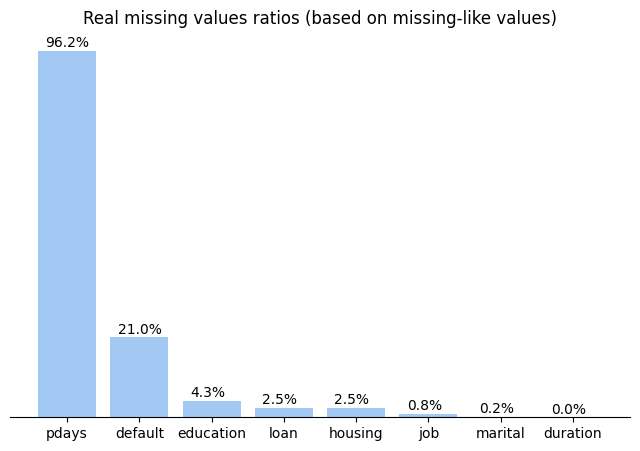

In [11]:
x = []
y = []
for col, val in real_nans.items():
    x.append(col)
    y.append(val[1])
x = [i for _, i in sorted(zip(y, x), key=lambda pair: pair[0])[::-1]]
y = sorted(y)[::-1]
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.bar(x=x, height=y, color=sns.color_palette()[0])
for a_x, a_val in enumerate(y):
    ax.annotate('{:.1f}%'.format(a_val), xy=(a_x-0.3, a_val+1))
ax.set_title('Real missing values ratios (based on missing-like values)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_yticks([]);

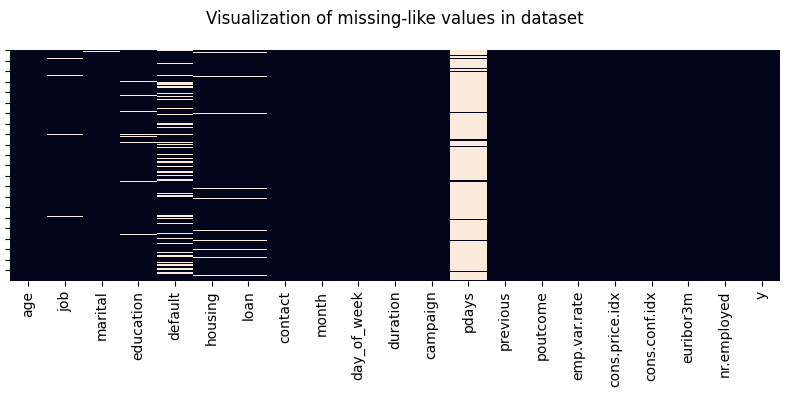

In [13]:
# ~(df.ne(999) & df.ne('unknown')) => df.ne() marks as True all "cells" which are not equal to given value
# df.ne() & df.ne() performs a "cell"-wise AND operator on 2 dataframes (which already contain True/False values only)
# and marks True only cells which are not equals neither first .ne() nor the second one
# Negate operator (~) inverses values to make False->True and thus converting them to 1 to display in heatmap
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.heatmap(~(df.ne(num_nan_equiv) & df.ne(cat_nan_equiv)), ax=ax, cbar=False)
ax.set_yticklabels([None]*len(ax.get_yticklabels()))
fig.suptitle('Visualization of missing-like values in dataset')
fig.tight_layout();

`pdays` feature has the maximum ratio of missing-like values (999) but it indicates that clients were not contacted on previous marketing campaign

In [14]:
# replacing string values in target with integers to ease further analysis
target_positive = 1
target_negative = 0
df['y'] = df['y'].map({'yes': target_positive, 'no': target_negative})
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
7309,50,blue-collar,single,basic.4y,no,no,no,telephone,may,thu,152,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
4169,51,services,married,professional.course,unknown,no,no,telephone,may,mon,158,5,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0
35810,46,technician,divorced,professional.course,no,yes,no,cellular,may,mon,214,2,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,0
9668,46,admin.,single,university.degree,no,yes,no,telephone,jun,mon,24,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0
34389,25,services,single,high.school,no,no,no,cellular,may,thu,646,5,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,1


Implementation of function calculating Weight-of-Evidence (WoE, can be used as a replacer value when encoding categorical columns) and Information Value (can be used as feature's predictive power measure) for categorical columns  
Encode possible values using Weight-of-Evidence (WoE) and/or Information Value (IV) approach  
$ WoE = \ln(\frac{EventShare}{NonEventShare}) $  
$ IV = \sum{(EventShare-NonEventShare)*WoE} $

In [15]:
# faster (almost 40% faster) version based on numpy arrays
def get_woe_cat(X, y, return_details=False):
    """
    Calculates Weight-of-Evidence indicator and returns its values (with additional details if asked)
    Input: X - pd.Serie of independent values
    y - pd.Serie of target values (0-negative, 1-positive)  
    """
    num_events_total = y.sum()
    num_nonevents_total = len(y) - num_events_total
    grouper = pd.DataFrame({'feature': X, 'target': y}).groupby('feature', as_index=True)

    num_total = grouper['target'].count().to_numpy()
    num_events = grouper['target'].sum().to_numpy()
    index = grouper['target'].sum().index
    
    num_nonevents = num_total - num_events
    events_share = num_events / num_events_total
    nonevents_share = num_nonevents / num_nonevents_total
    woe = np.log((events_share+0.001) / (nonevents_share+0.001)) # adding small value to nominator and denominator to exclude division by 0 error
    iv = (events_share - nonevents_share) * woe
    
    if return_details:
        return (
            pd.DataFrame({
                    'num_events': num_events, 
                    'num_nonevents': num_nonevents,
                    'num_cat_total': num_total, 
                    'events_share': events_share, 
                    'nonevents_share': nonevents_share, 
                    'woe': woe, 
                    'iv': iv
                }, 
                index = index
            ),
            iv.sum()
        )
    else:
        return (pd.Series(woe, index=index, name='woe'), iv.sum())


In [18]:
def interpret_iv(iv):
    if iv < 0.02:
        return 'useless'
    elif iv >= 0.02 and iv < 0.1:
        return 'weak'
    elif iv >=0.1 and iv < 0.3:
        return 'medium'
    elif iv >= 0.3 and iv < 0.5:
        return 'strong'
    else:
        return 'suspicious'

In [16]:
print('Calculating prediction strength of features:')
print('Feature \tInformation Value')
print('-'*25)
ivs = []
cols = []
for col in df.select_dtypes(include='object').columns.difference(other=['y']):
    (woe, iv) = get_woe_cat(df[col], df['y'])
    print('{:12} \t{:.4f}'.format(col, iv))
    cols.append(col)
    ivs.append(iv)
idxs = np.argsort(np.array(ivs))
cols = np.array(cols)[idxs][::-1]
ivs = np.array(ivs)[idxs][::-1]

Calculating prediction strength of features:
Feature 	Information Value
-------------------------
contact      	0.2425
day_of_week  	0.0034
default      	0.1220
education    	0.0509
housing      	0.0006
job          	0.1740
loan         	0.0000
marital      	0.0307
month        	0.4527
poutcome     	0.5355


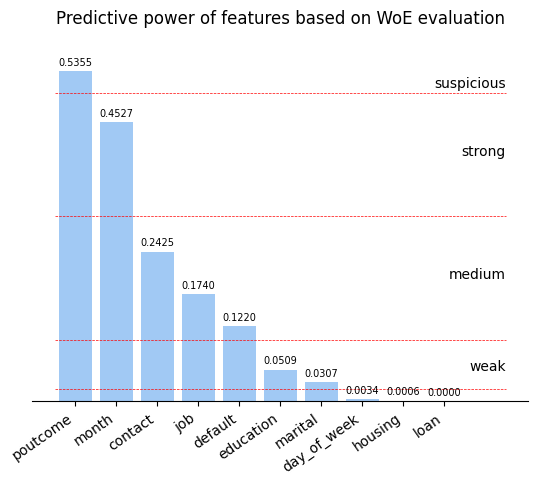

In [17]:
# plotting predictive power based on woe value
plt.bar(x=cols, height=ivs)
plt.plot([-0.5, len(ivs)+0.5], [0.02, 0.02], 'r--', lw=0.5)
plt.plot([-0.5, len(ivs)+0.5], [0.1, 0.1], 'r--', lw=0.5)
plt.plot([-0.5, len(ivs)+0.5], [0.3, 0.3], 'r--', lw=0.5)
plt.plot([-0.5, len(ivs)+0.5], [0.5, 0.5], 'r--', lw=0.5)
plt.annotate('weak', xy=(len(ivs)+0.5,0.05), ha='right')
plt.annotate('medium', xy=(len(ivs)+0.5,0.2), ha='right')
plt.annotate('strong', xy=(len(ivs)+0.5,0.4), ha='right')
plt.annotate('suspicious', xy=(len(ivs)+0.5,0.51), ha='right')
ax = plt.gca()
for a_x, a_val in enumerate(ivs):
    plt.annotate('{:.4f}'.format(a_val), xy=(a_x-0.4, a_val+0.01), fontsize=7)
plt.xticks(rotation=35, ha='right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_yticks([])
ax.set_ybound(upper=0.6)
plt.title('Predictive power of features based on WoE evaluation');

According to [web info](https://www.analyticsvidhya.com/blog/2021/06/understand-weight-of-evidence-and-information-value/) there are following ranges to determine predictive power of feature:  
  
| Information Value | Predictive power  |
| --- | --- |    
| <0.02             | Useless           |  
| 0.02 to 0.1       | Weak predictors   |  
| 0.1 to 0.3        | Medium Predictors |  
| 0.3 to 0.5        | Strong predictors |  
| >0.5              | Suspicious        |  

### 3. Check correlations between features

In [19]:
personal_columns = list(df.columns[:4])+list(df.columns[5:7]) # exclude 'default' feature
print(personal_columns)

['age', 'job', 'marital', 'education', 'housing', 'loan']


Correlation also can help to suppose values to use in imputing process

We have numeric features only in 'Previous Campaign Results' (features 9-12) and 'Socioeconomic Indicators' (features 14-18) sections (not saying about age).  
Obviously 'Socioeconomic Indicators' don't have a causal relations with individual characteristics even if correlation is high. So we will not analyse these cross-section values.  
But we would like to test some relations between 'Individual Characteristics' section's features:
- is there any relation between:
    - age and job?
    - age and marital?
    - job and edication?
- are any of individual characteristics in relation with presence / absence of loans? 

<AxesSubplot: >

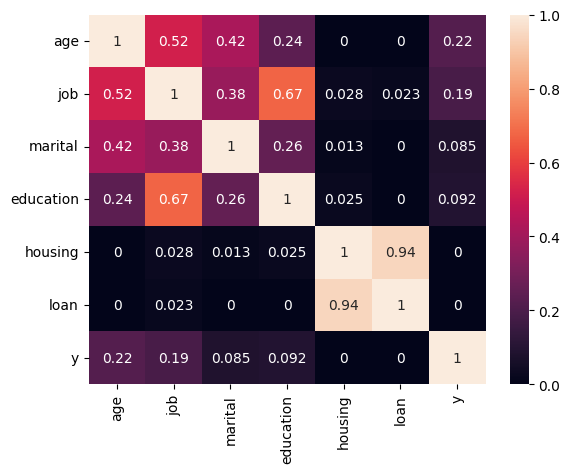

In [21]:
# use phi_k coefficient to measure degree of association
phik_overview = df[list(personal_columns)+['y']].phik_matrix(interval_cols=['age'])
sns.heatmap(phik_overview, annot=True)

There are no features that highly correllated with target ('y')  
We have 3 relatively strong associations: (1) between education and job (0.67), (2) between job and age (0.52) and (3) marital and age (0.42)  
We can experiment with excluding one of these features from dataset when training model  

Let's show the association between education and job

C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_2024\3398703147.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=[t.get_text() for t in ax.get_xticklabels()], ha='right', rotation=35);


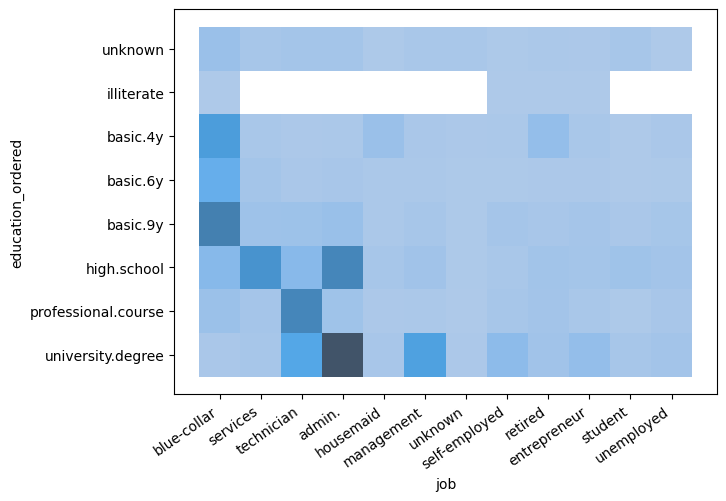

In [22]:
# converting `education` column to ordered categorical type to get ordered chart output
education_ordered = ['unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']
df['education_ordered'] = pd.Categorical(df['education'], education_ordered, ordered=True)

# building 2-axis histogram (like heatmap)
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
sns.histplot(data=df, x='job', y='education_ordered', ax=ax)
ax.set_xticklabels(labels=[t.get_text() for t in ax.get_xticklabels()], ha='right', rotation=35);

Let's check age distribution for other categorical features values to possibly gain some insights

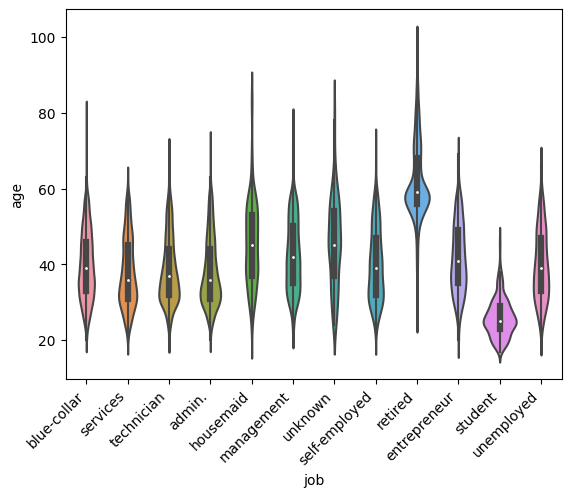

In [23]:
#fig, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.violinplot(data=df, x='job', y='age')
plt.xticks(rotation=45, ha='right');

As expected 'retired' and 'student' classes distributions are shifted. But for others there is nothing unusual

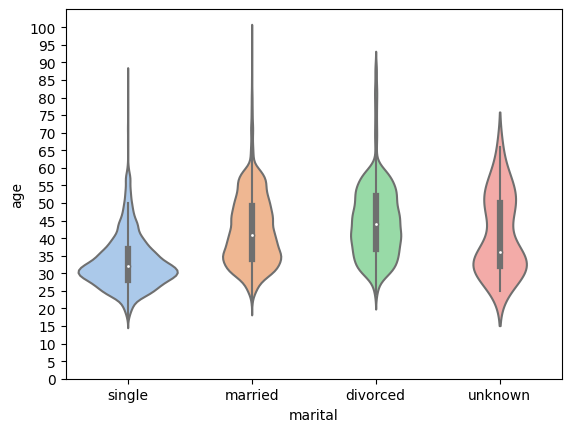

In [24]:
sns.violinplot(data=df, x='marital', y='age')
plt.yticks(range(0, 105, 5));

'unknown' value's distribution is multimodal. 1st mode is near equivalent of 'single' value's distribution one

C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_2024\3352124867.py:1: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.displot(data=df[df['marital'] != cat_nan_equiv], x='age', hue='marital', kind='kde', palette=sns.color_palette('pastel'), fill=True);


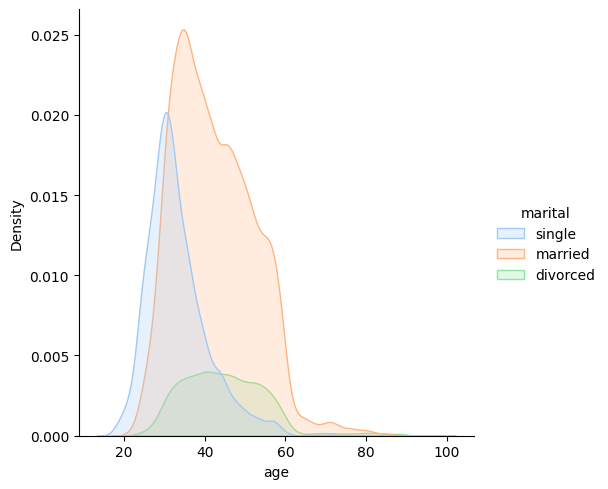

In [25]:
sns.displot(data=df[df['marital'] != cat_nan_equiv], x='age', hue='marital', kind='kde', palette=sns.color_palette('pastel'), fill=True);

We can impute job and education (strongest association) based on most frequent corresponding values

In [26]:
def get_reference_values(df, base_feat, reference_feat, nan_equiv=np.nan):
    """
    Calculates most_frequent values of base_feat for each corresponding value of reference_feat
    Both features have to be categorical. If reference_feat is numerical it is possible to split it to bins
    and use function using bins instead of exact values 
    Returns a dictionary with reference_value: base_value pairs made using most_frequent strategy
    """
    is_numeric = True
    try:
        np.float64(nan_equiv)
    except ValueError:
        is_numeric = False
    if is_numeric and np.isnan(nan_equiv):
        ct = pd.crosstab(df[base_feat], df[reference_feat]) # rows = values of base feature, cols = values of reference feature
    else:
        ct = pd.crosstab(df.loc[(df[base_feat] != nan_equiv), base_feat], df[reference_feat])
    index = ct.index
    columns = ct.columns
    return {columns[i]: index[val] for i, val in enumerate(ct.to_numpy().argmax(axis=0))}

Imputing education based on most frequent job

In [27]:
m = df['education'] == cat_nan_equiv
df.loc[m, 'education'] = df.loc[m, 'job'].map(get_reference_values(df, 'education', 'job', nan_equiv='unknown'))

Imputing job based on most frequent education

In [28]:
m = df['job'] == cat_nan_equiv
df.loc[m, 'job'] = df.loc[m, 'education'].map(get_reference_values(df, base_feat='job', reference_feat='education', nan_equiv='unknown'))

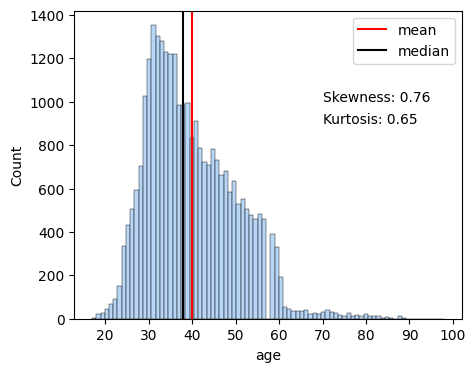

In [36]:
# Checking age distribution
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
sns.histplot(data=df, x='age', ax=ax)
ax.axvline(x=df['age'].mean(), color='r', label='mean')
ax.axvline(x=df['age'].median(), color='k', label='median')
ax.text(x=70, y=1000, s=f"Skewness: {df['age'].skew():.2f}")
ax.text(x=70, y=900, s=f"Kurtosis: {df['age'].kurt():.2f}")
ax.legend();

In [40]:
bins = pd.IntervalIndex.from_breaks(np.arange(15, 100, 10))
df['age_bins'] = pd.cut(df['age'], bins=bins)

<AxesSubplot: >

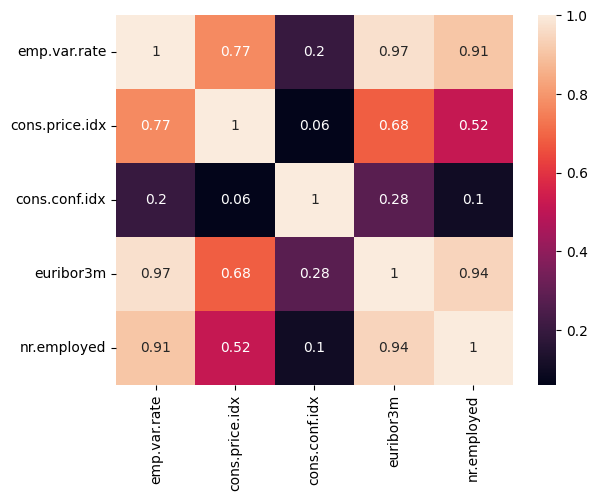

In [37]:
# check the correlation between socioeconomic features
soc_econ_features = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
m_corr = df[soc_econ_features].corr()
sns.heatmap(m_corr, annot=True)

We have highly correlated features. This might be a problem for some ML models. Possibly we will have to drop some of them depending on the chosen model.

### 4. `loan` and `housing` features

Although these features are considered useless we will keep them for now and see if they really will not help model to predict

In [38]:
pd.crosstab(df['loan'].fillna('missing'), df['housing'].fillna('missing'), margins=True)

housing,no,unknown,yes,All
loan,,,,
no,11208,0,12493,23701
unknown,0,707,0,707
yes,1805,0,2618,4423
All,13013,707,15111,28831


These 707 'unknown' values are shared indeed. These features may correspond with age (housing loans might be paid off by elders) / job (due to bank's processes of credit scoring) / education / marital status

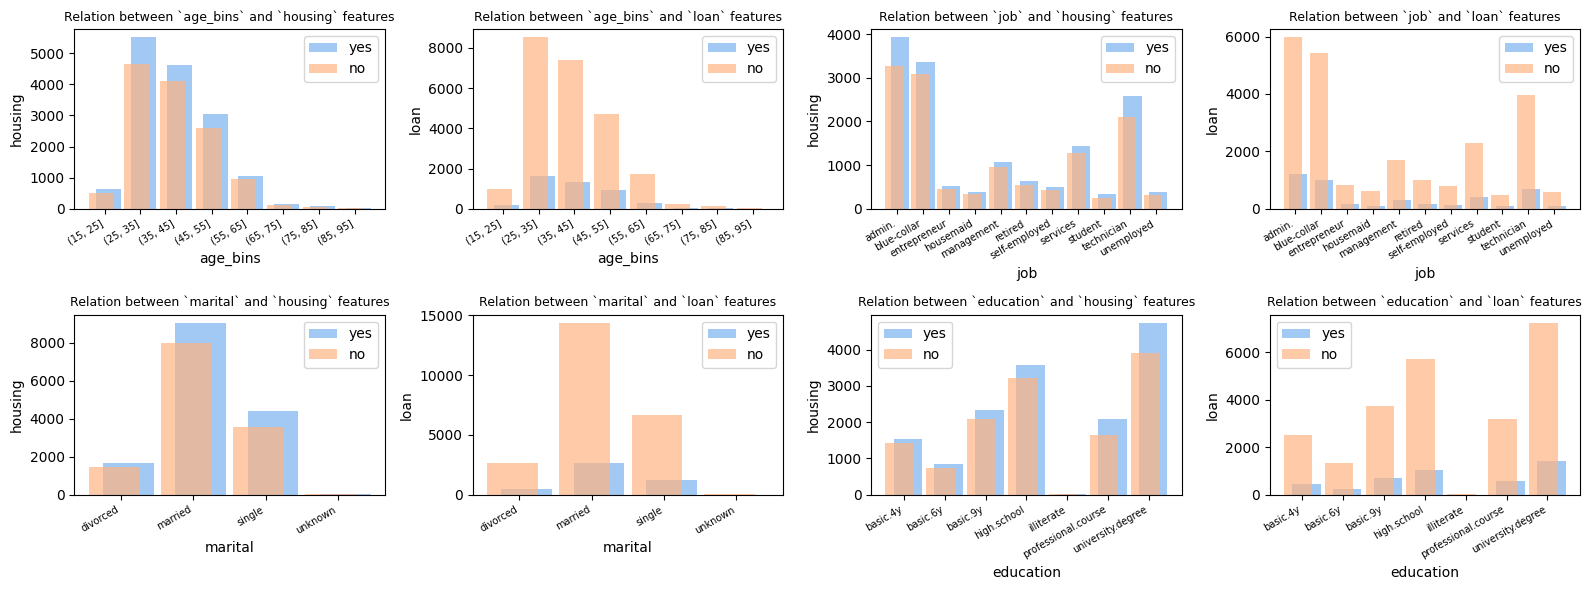

In [44]:
x_features = ['age_bins', 'age_bins', 'job', 'job', 'marital', 'marital', 'education', 'education']
y_features = ['housing', 'loan', 'housing', 'loan', 'housing', 'loan', 'housing', 'loan']

chart_rows, charts_per_row = 2, 4
sns.set_palette('pastel')
fig, axs = plt.subplots(chart_rows, charts_per_row, figsize=(4*charts_per_row,  3*chart_rows))

for ax, x_feature, y_feature in zip(axs.flatten(), x_features, y_features):
    ct = pd.crosstab(df[x_feature], df[y_feature])

    ax.bar(x=[x+0.1 for x in range(len(ct))], height=ct['yes'], width=0.7, label='yes')
    ax.bar(x=[x-0.1 for x in range(len(ct))], height=ct['no'], width=0.7, alpha=0.7, label='no')
    ax.set_xticks(range(len(ct)))
    ax.set_xticklabels([str(x) for x in ct.index], fontsize=7, rotation=30, ha='right')
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)
    ax.legend()
    ax.set_title(f'Relation between `{x_feature}` and `{y_feature}` features', fontsize=9)
plt.tight_layout();

In [48]:
# filling nan equivalent values in 'housing' with most frequent value 
feat = 'housing'
m = (df[feat] == cat_nan_equiv) # boolean mask to filter rows with nan equivalent value
df.loc[m, feat] = df[feat].value_counts().index[0]
df.loc[m, feat].value_counts()

yes    707
Name: housing, dtype: int64

Now we have all 'unknown' replaced with 'yes' in `housing`. Let's do the same for `loan` but with 'no' value

In [50]:
feat = 'loan'
m = (df[feat] == cat_nan_equiv) # boolean mask to filter rows with nan equivalent value
df.loc[m, feat] = df[feat].value_counts().index[0]
df.loc[m, feat].value_counts()

no    707
Name: loan, dtype: int64

### 5. `contact` feature


`contact` feature can be one-hot encoded with 1 column (check if this feature contains useful info for model)

In [51]:
df['contact'].value_counts(dropna=False)

cellular     18302
telephone    10529
Name: contact, dtype: int64

In [52]:
# converting to binary integer 'Cellular or not' 
df['contact'] = df['contact'].map({'cellular': 1.0, 'telephone': 0.0})
df['contact'].value_counts()

1.0    18302
0.0    10529
Name: contact, dtype: int64

### 7. `day_of_week` feature

In [53]:
woe, iv = get_woe_cat(df['day_of_week'], df['y'])
print('Information Value: {:.4f} ({})'.format(iv, interpret_iv(iv)))
woe

Information Value: 0.0034 (useless)


feature
fri   -0.0149
mon   -0.1041
thu    0.0650
tue    0.0148
wed    0.0335
Name: woe, dtype: float64

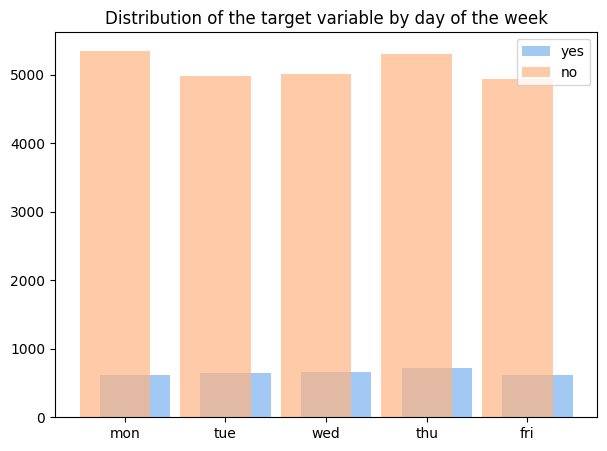

In [54]:
sorted_dow = ['mon', 'tue', 'wed', 'thu', 'fri']
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ct = pd.crosstab(df['day_of_week'], df['y'])
ax.bar(x=[x+0.1 for x in range(len(sorted_dow))], height=[ct.loc[x, target_positive] for x in sorted_dow], width=0.7, label='yes')
ax.bar(x=[x-0.1 for x in range(len(sorted_dow))], height=[ct.loc[x, target_negative] for x in sorted_dow], width=0.7, alpha=0.7, label='no')
ax.set_xticks(range(len(ct)))
ax.set_xticklabels(sorted_dow)
ax.set_title('Distribution of the target variable by day of the week')
ax.legend();

There are small variations between days but it will be better to test experimentally if this feature is useful for model

### 8. `campaign` feature

Reminder: `campaign` - number of contacts performed during this campaign and for this client (numeric, includes last contact)  
`campaign` feature skewed (long right tail) should be cutted based on 1.5*IQR

In [55]:
# check predictive power for initial feature based on WOE/IV
woe, iv = get_woe_cat(df['campaign'], df['y'])
print('Information Value: {:.4f} ({})'.format(iv, interpret_iv(iv)))

Information Value: 0.0485 (weak)


In [56]:
df['campaign'].describe()

count    28831.0000
mean         2.5575
std          2.7531
min          1.0000
25%          1.0000
50%          2.0000
75%          3.0000
max         56.0000
Name: campaign, dtype: float64

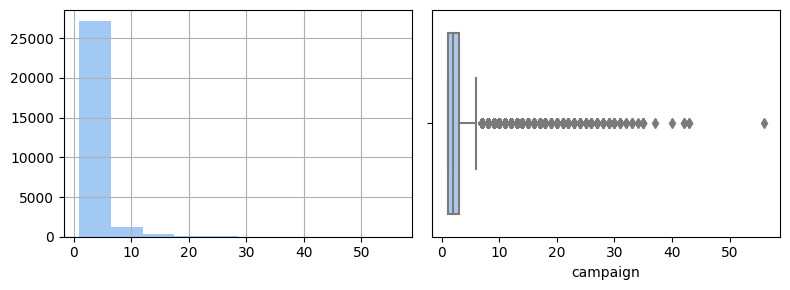

In [57]:
# check distribution
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharex=True)
df['campaign'].hist(ax=axs[0])
# check distribution by boxplot + identifying outliers
sns.boxplot(data=df, x='campaign', ax=axs[1])
fig.tight_layout();

In [58]:
# consider outliers as values > Q3 + 1.5*IQR
q1 = df['campaign'].quantile(0.25)
q3 = df['campaign'].quantile(0.75)
iqr = q3 - q1
cutoff_val = q3 + 1.5 * iqr
print(f'Q1  = {q1}')
print(f'Q3  = {q3}')
print(f'IQR = {iqr}')
print(f'Cutoff value: {cutoff_val}')
# df[df['campaign'] > cutoff_val]['campaign'] # to show outliers

Q1  = 1.0
Q3  = 3.0
IQR = 2.0
Cutoff value: 6.0


yes/no ratio for `campaign` values
1.0: 0.147
2.0: 0.133
3.0: 0.122
4.0: 0.103
5.0: 0.078
6.0: 0.060


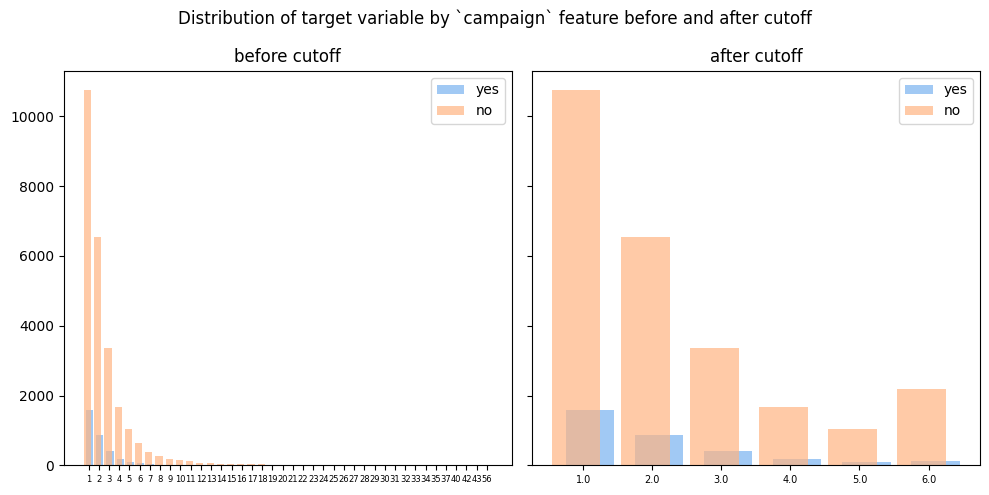

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(10,5), sharey=True)
ct = pd.crosstab(df['campaign'], df['y'])
ax[0].bar(x=[x+0.1 for x in range(len(ct.index))], height=ct[target_positive], width=0.7, label='yes')
ax[0].bar(x=[x-0.1 for x in range(len(ct.index))], height=ct[target_negative], width=0.7, alpha=0.7, label='no')
ax[0].set_xticks(range(len(ct)))
ax[0].set_xticklabels(ct.index, fontsize=6)
ax[0].legend()
ax[0].set_title('before cutoff')

ct = pd.crosstab(df['campaign'].apply(lambda x: np.min([x, cutoff_val])), df['y'])
ax[1].bar(x=[x+0.1 for x in range(len(ct.index))], height=ct[target_positive], width=0.7, label='yes')
ax[1].bar(x=[x-0.1 for x in range(len(ct.index))], height=ct[target_negative], width=0.7, alpha=0.7, label='no')
ax[1].set_xticks(range(len(ct)))
ax[1].set_xticklabels(ct.index, fontsize=7)
ax[1].legend()
ax[1].set_title('after cutoff')
fig.suptitle('Distribution of target variable by `campaign` feature before and after cutoff')
fig.tight_layout();
print('yes/no ratio for `campaign` values')
# yes / no values ratio for information
for x in ct.index:
    print('{}: {:.3f}'.format(x, ct.loc[x, 1]/ct.loc[x, 0]))

So in average the odds of opening deposit have negative relation with number of contacts

In [60]:
# performing real cutoff to dataset
df['campaign'] = df['campaign'].apply(lambda x: np.min([x, cutoff_val]))

### 9. Explore `pdays`, `previous`, `poutcome` features

Explore `pdays`, `previous`, `poutcome` features:
- `pdays` contains hidden NAN value (999) in 96% of records => can be dropped (+ explore correlation with `previous` and `poutcome` features)
- `previous` feature contains zeros in 86% of records => check if can be dropped (+ explore correlation with `pdays` and `poutcome` features)
- `poutcome` feature contains 'nonexistent' value in 86% of records (probably the same where `previous` == 0) 

Reminder:  
`pdays` - number of days that passed by after the client was last contacted from a previous campaign  
`previous` - number of contacts performed before this campaign and for this client (numeric)  
`poutcome` - outcome of the previous marketing campaign

#### 9.1. Exploring `pdays` feature

<AxesSubplot: xlabel='pdays'>

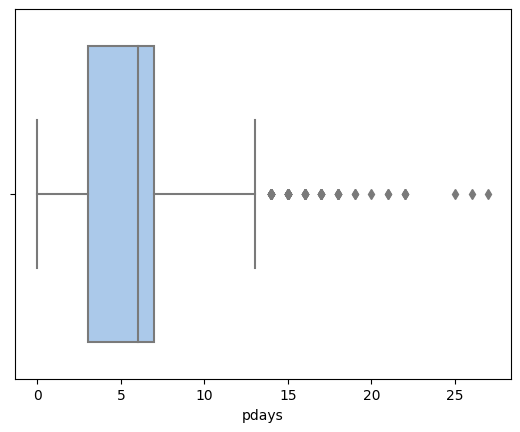

In [61]:
# boxplot of pdays to detect outlier values (excluding value 999)
sns.boxplot(data=df[df['pdays'] < 999], x='pdays')

In [62]:
# check what values are beyond Q3+1.5*IQR (except value 999)
q1 = df[df['pdays'] < num_nan_equiv]['pdays'].quantile(0.25)
q3 = df[df['pdays'] < num_nan_equiv]['pdays'].quantile(0.75)
iqr = q3 - q1
cutoff_val = q3 + 1.5 * iqr
print(f'Q1  = {q1}')
print(f'Q3  = {q3}')
print(f'IQR = {iqr}')
print(f'Cutoff value: {cutoff_val}')

Q1  = 3.0
Q3  = 7.0
IQR = 4.0
Cutoff value: 13.0


Seems in most cases if client was contacted in previous campaign the probability of positive decision is higher. Let's check it visually

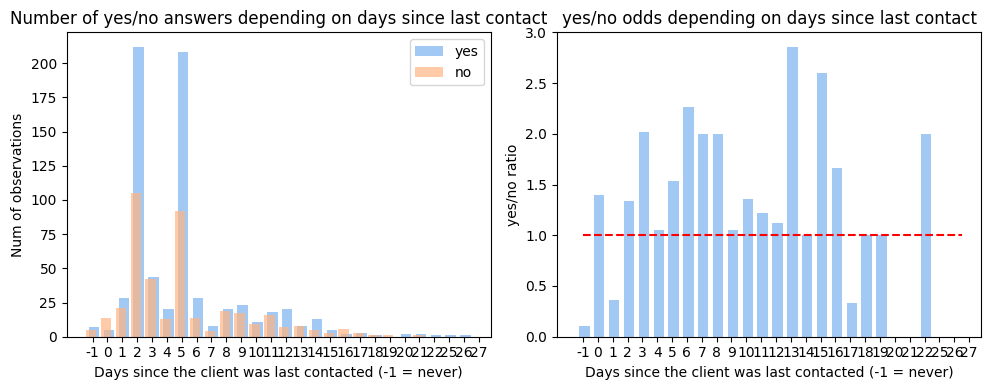

In [66]:
ct = pd.crosstab(df[df['pdays'] < num_nan_equiv]['pdays'], df['y']).sort_index(axis=0)
#ct.transpose()
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
axs[0].bar(x=[x+0.1 for x in range(len(ct.index))], height=ct[target_positive], width=0.7, label='yes')
axs[0].bar(x=[x-0.1 for x in range(len(ct.index))], height=ct[target_negative], width=0.7, alpha=0.7, label='no')
axs[0].set_xticks(range(len(ct)))
axs[0].set_xticklabels(ct.index)
axs[0].set_ylabel('Num of observations')
axs[0].legend()
axs[0].set_title('Number of yes/no answers depending on days since last contact')
axs[0].set_xlabel('Days since the client was last contacted (-1 = never)')

# replace 999 values with -1 to make more consistent scale
ct = pd.crosstab(df.replace({'pdays': {num_nan_equiv: -1}})['pdays'], df['y']).sort_index(axis=0)
#ct.transpose()
#fig, ax = plt.subplots(1, 1, figsize=(7, 5))
axs[1].bar(x=[x+0.1 for x in range(len(ct.index))], height=ct[target_positive]/ct[target_negative], width=0.7, label='yes/no odds')
#ax.bar(x=[x-0.1 for x in range(len(ct.index))], height=ct[target_negative], width=0.7, alpha=0.7, label='no')
axs[1].plot([0, 25.5], [1.0, 1.0], 'r--')
axs[1].set_xticks(range(len(ct)))
axs[1].set_xticklabels(ct.index)
axs[1].set_xlabel('Days since the client was last contacted (-1 = never)')
axs[1].set_ylabel('yes/no ratio')
axs[1].set_title('yes/no odds depending on days since last contact')
#ax.legend();
fig.tight_layout();

We have 2 peaks here. Think in case of binning they should refer to different bins.  
The alternative is to binarize column (possibly as an additional feature?) by replacing 999 with 0 (not contacted before) and all other values with 1 (contacted before)  

#### 9.2. Exploring `previous` feature

In [67]:
print('Missing-like value `0` share: {:.2f}%'.format(df['previous'].value_counts()[0] *100 / len(df)))
df['previous'].value_counts()

Missing-like value `0` share: 86.15%


0    24838
1     3234
2      534
3      151
4       56
5       12
6        5
7        1
Name: previous, dtype: int64

`previous` feature seems like `pdays` as 86% of all values is 0  
Checking correspondence between `pdays` and `previous`  

In [68]:
pd.crosstab(df.loc[df['pdays']==num_nan_equiv, 'pdays'], df['previous'])

previous,0,1,2,3,4,5,6
pdays,,,,,,,
999,24838,2610,246,30,8,1,1


Here we have very strange combinations of `pdays` == 999 AND `previous` > 0. Both features are related to previous contacts.  
So one feature (`pdays`==999) tells us the client was not contacted and the other (`previous`>0) tells an opposite.  
In real project this situation would demand further exploration

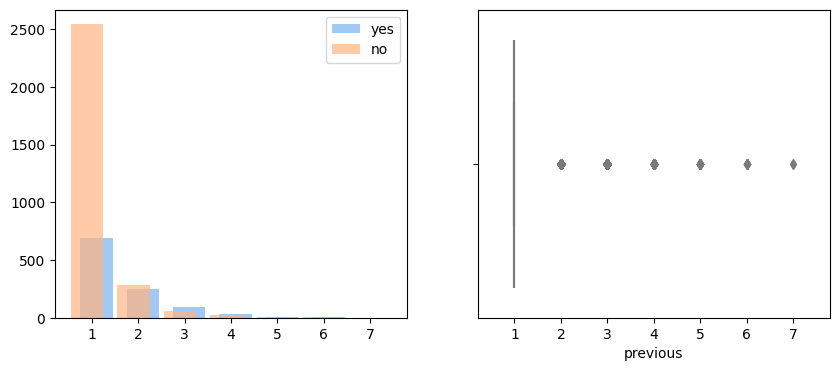

In [69]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
ct = pd.crosstab(df[df['previous'] > 0]['previous'], df['y']).sort_index(axis=0)
axs[0].bar(x=[x+1.1 for x in range(len(ct.index))], height=ct[target_positive], width=0.7, label='yes')
axs[0].bar(x=[x+0.9 for x in range(len(ct.index))], height=ct[target_negative], width=0.7, alpha=0.7, label='no')
axs[0].set_xticks(range(1, 8))
axs[0].legend();

# boxplot of to detect outlier values (excluding value 0)
sns.boxplot(data=df[df['previous'] > 0], x='previous', ax=axs[1])
axs[1].set_xticklabels(range(1, 8));

So each value except 1 can be treated as outlier

In [70]:
print('Total num of records: {}, category threshold size: {}'.format(len(df), np.ceil(0.05 * len(df))))
print('With `0` value excluded - total: {} , threshold size: {}'.format(len(df[df['previous'] > 0]), np.ceil(0.05*len(df[df['previous'] > 0]))))
df.groupby(by='previous')[['previous', 'y']].agg({'previous': ['count'], 'y': ['sum', 'mean']})

Total num of records: 28831, category threshold size: 1442.0
With `0` value excluded - total: 3993 , threshold size: 200.0


previous     y        
            count   sum    mean
previous                       
0           24838  2181  0.0878
1            3234   691  0.2137
2             534   246  0.4607
3             151    89  0.5894
4              56    30  0.5357
5              12     8  0.6667
6               5     3  0.6000
7               1     0  0.0000

Considering 3 as a cutoff value will provide necessary category threshold size > 200 after cutoff

In [71]:
m = df['previous'] > 3
df['previous'] = df['previous'].apply(lambda x: np.min([x, 3]))

#### 9.3. Exploring `poutcome` feature

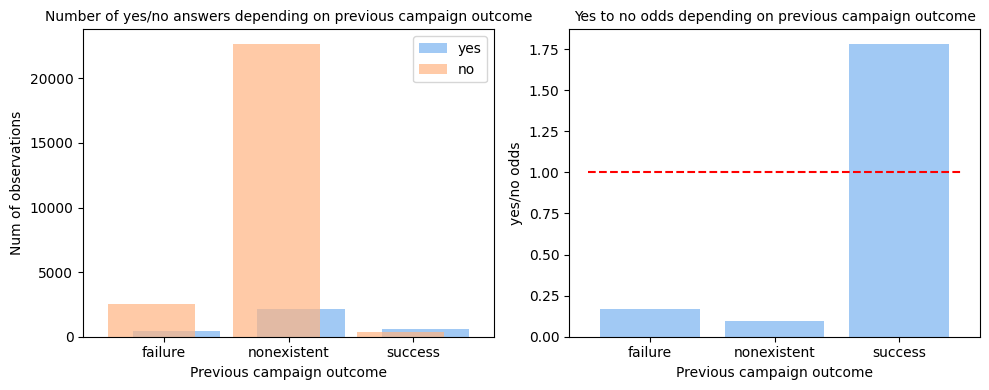

In [76]:
ct = pd.crosstab(df['poutcome'], df['y'])

fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
axs[0].bar(x=[x+0.1 for x in range(len(ct.index))], height=ct[target_positive], width=0.7, label='yes')
axs[0].bar(x=[x-0.1 for x in range(len(ct.index))], height=ct[target_negative], width=0.7, alpha=0.7, label='no')
axs[0].set_xticks(range(len(ct)))
axs[0].set_xticklabels(ct.index)
axs[0].set_ylabel('Num of observations')
axs[0].legend()
axs[0].set_title('Number of yes/no answers depending on previous campaign outcome', fontsize=10)
axs[0].set_xlabel('Previous campaign outcome')

axs[1].bar(x=ct.index, height=ct[1]/ct[0])
axs[1].plot([-0.5, 2.5], [1, 1], 'r--')
axs[1].set_xlabel('Previous campaign outcome')
axs[1].set_ylabel('yes/no odds')
axs[1].set_title('Yes to no odds depending on previous campaign outcome', fontsize=10)

fig.tight_layout();

Negative / positive target ratio for each feature's value shows that this feature could be a useful predictor in case customer was contacted in previous marketing campaign

### 10. Drop `duration` feature

In [78]:
df = df.drop(columns='duration')

## Final look of the dataset

In [79]:
# check if missing-like values remained
print(f'Calculating real NaNs ratio using `{cat_nan_equiv}` and `{num_nan_equiv}` keyvalues:')
print('Column (value) \tNvalues \tRatio')
print('-'*40)
for col in df.columns:
    if df[col].dtype == 'object':
        nan_equiv = cat_nan_equiv
    else:
        nan_equiv = num_nan_equiv
    if nan_equiv in list(df[col]):
        freq_table = df[col].value_counts()
        print('{} (`{}`) \t{} \t{:.1f}%'.format(col, nan_equiv, freq_table[nan_equiv], 100 * freq_table[nan_equiv] / len(df)))

Calculating real NaNs ratio using `unknown` and `999` keyvalues:
Column (value) 	Nvalues 	Ratio
----------------------------------------
marital (`unknown`) 	58 	0.2%
default (`unknown`) 	6051 	21.0%
pdays (`999`) 	27734 	96.2%


There are missing-like values left in dataset. They will be replaced with some values while preprocessing using pipeline

In [80]:
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_ordered,age_bins
23808,35,technician,married,high.school,no,yes,no,1.0,aug,fri,1.0,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0,high.school,"(25, 35]"
13890,33,admin.,married,high.school,no,yes,no,1.0,jul,fri,2.0,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0,high.school,"(25, 35]"
12605,50,technician,married,professional.course,no,no,no,1.0,jul,mon,5.0,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,1,professional.course,"(45, 55]"
30432,38,management,married,university.degree,no,no,no,1.0,may,mon,3.0,999,0,nonexistent,-1.8,92.893,-46.2,1.354,5099.1,0,university.degree,"(35, 45]"
28594,57,technician,married,high.school,no,yes,no,1.0,apr,wed,1.0,999,1,failure,-1.8,93.075,-47.1,1.415,5099.1,0,high.school,"(55, 65]"
28440,33,services,married,high.school,no,yes,no,1.0,apr,thu,1.0,999,1,failure,-1.8,93.075,-47.1,1.435,5099.1,0,high.school,"(25, 35]"
9238,50,management,married,university.degree,unknown,no,no,0.0,jun,fri,2.0,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,0,university.degree,"(45, 55]"
8141,40,admin.,married,high.school,no,no,no,0.0,jun,tue,3.0,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,0,high.school,"(35, 45]"
24947,44,management,married,basic.9y,no,no,no,1.0,nov,tue,2.0,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0,basic.9y,"(35, 45]"
12999,28,services,married,high.school,no,no,no,1.0,jul,tue,1.0,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0,high.school,"(25, 35]"


In [81]:
df.shape

(28831, 22)

In [82]:
df.to_csv('datasets/processed/bank-train-cleaned.csv', index=False)

Based on the Weight of Evidence approach the predictive powers of features were evaluated.
All features were left except ‘duration’.  
Dataset is highly imbalanced so missing-like data was retained to encode it later.  
3 highly correlated features found. They are 'euribor3m', 'nr.employed' and 'emp.var.rate' (Pearson’s r > 0.9). This is a potential problem for some ML model types.